### Sub-Problem 2: Are there particular locations in Seattle where AirBnb listings fetch higher prices?

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib
sb.set()

In [3]:
#importing the listing dataset
listingsDF = pd.read_csv("D:\Projects\Airbnb_Seattle\data\listings.csv")
listingsDF.head()

<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Rutika\AppData\Local\Temp\ipykernel_2788\349338909.py:2: SyntaxWarning: invalid escape sequence '\P'
  listingsDF = pd.read_csv("D:\Projects\Airbnb_Seattle\data\listings.csv")


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


### Data Cleaning

In [4]:
#taking below varibales for further analysis
listingDF = listingsDF[['id','name','summary','longitude','latitude','space','description','instant_bookable','neighborhood_overview','neighbourhood_cleansed','host_id','host_name','host_since',
                 'host_response_time','street', 'zipcode','review_scores_rating','property_type','room_type','accommodates','bathrooms','bedrooms','beds','reviews_per_month','amenities','cancellation_policy','number_of_reviews','price']]
listingDF.head()

,id,name,summary,longitude,latitude,space,description,instant_bookable,neighborhood_overview,neighbourhood_cleansed,...,room_type,accommodates,bathrooms,bedrooms,beds,reviews_per_month,amenities,cancellation_policy,number_of_reviews,price
0,241032,Stylish Queen Anne Apartment,NaN,-122.371025,47.636289,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,f,NaN,West Queen Anne,...,Entire home/apt,4,1.0,1.0,1.0,4.07,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",moderate,207,$85.00
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,-122.365666,47.639123,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,f,"Queen Anne is a wonderful, truly functional vi...",West Queen Anne,...,Entire home/apt,4,1.0,1.0,1.0,1.48,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",strict,43,$150.00
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,-122.369483,47.629724,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,f,Upper Queen Anne is a charming neighborhood fu...,West Queen Anne,...,Entire home/apt,11,4.5,5.0,7.0,1.15,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",strict,20,$975.00
3,7421966,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,-122.369279,47.638473,NaN,A charming apartment that sits atop Queen Anne...,f,NaN,West Queen Anne,...,Entire home/apt,3,1.0,0.0,2.0,NaN,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",flexible,0,$100.00
4,278830,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,-122.372471,47.632918,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,f,We are in the beautiful neighborhood of Queen ...,West Queen Anne,...,Entire home/apt,6,2.0,3.0,3.0,0.89,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",strict,38,$450.00


In [5]:
#replace NaN values with 0
listingDF.fillna(0, inplace=True)

#extract prices from listingDF into priceDF
priceDF = listingDF['price']
# Create an empty prices list
prices=[]

#convert prices from listingDF into float values and append it in prices list
for p in priceDF:
    p = float(p[1:].replace(',',''))
    prices.append(p)
    
#replace the price column in the original listingDF with the new prices
listingDF['price'] = prices

#remove listings with 0 for price
listingDF = listingDF[listingDF.price > 0]

listingDF = listingDF[listingDF.bedrooms > 0]
listingDF = listingDF[listingDF.bathrooms > 0]
listingDF = listingDF[listingDF.accommodates > 0]
listingDF = listingDF[listingDF.beds > 0]
listingDF = listingDF[listingDF.review_scores_rating > 0]
listingDF = listingDF[listingDF.reviews_per_month > 0]

listingDF.head()

C:\Users\Rutika\AppData\Local\Temp\ipykernel_2788\3731585256.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listingDF.fillna(0, inplace=True)
C:\Users\Rutika\AppData\Local\Temp\ipykernel_2788\3731585256.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listingDF['price'] = prices


,id,name,summary,longitude,latitude,space,description,instant_bookable,neighborhood_overview,neighbourhood_cleansed,...,room_type,accommodates,bathrooms,bedrooms,beds,reviews_per_month,amenities,cancellation_policy,number_of_reviews,price
0,241032,Stylish Queen Anne Apartment,0,-122.371025,47.636289,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,f,0,West Queen Anne,...,Entire home/apt,4,1.0,1.0,1.0,4.07,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",moderate,207,85.0
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,-122.365666,47.639123,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,f,"Queen Anne is a wonderful, truly functional vi...",West Queen Anne,...,Entire home/apt,4,1.0,1.0,1.0,1.48,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",strict,43,150.0
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,-122.369483,47.629724,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,f,Upper Queen Anne is a charming neighborhood fu...,West Queen Anne,...,Entire home/apt,11,4.5,5.0,7.0,1.15,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",strict,20,975.0
4,278830,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,-122.372471,47.632918,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,f,We are in the beautiful neighborhood of Queen ...,West Queen Anne,...,Entire home/apt,6,2.0,3.0,3.0,0.89,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",strict,38,450.0
5,5956968,Private unit in a 1920s mansion,We're renting out a small private unit of one ...,-122.366174,47.630525,If you include a bit of your background in you...,We're renting out a small private unit of one ...,f,This part of Queen Anne has wonderful views an...,West Queen Anne,...,Private room,2,1.0,1.0,1.0,2.45,"{""Wireless Internet"",""Free Parking on Premises...",strict,17,120.0


#### Analyzing neighbourhood with price of listing

<Axes: xlabel='property_type', ylabel='neighbourhood_cleansed'>

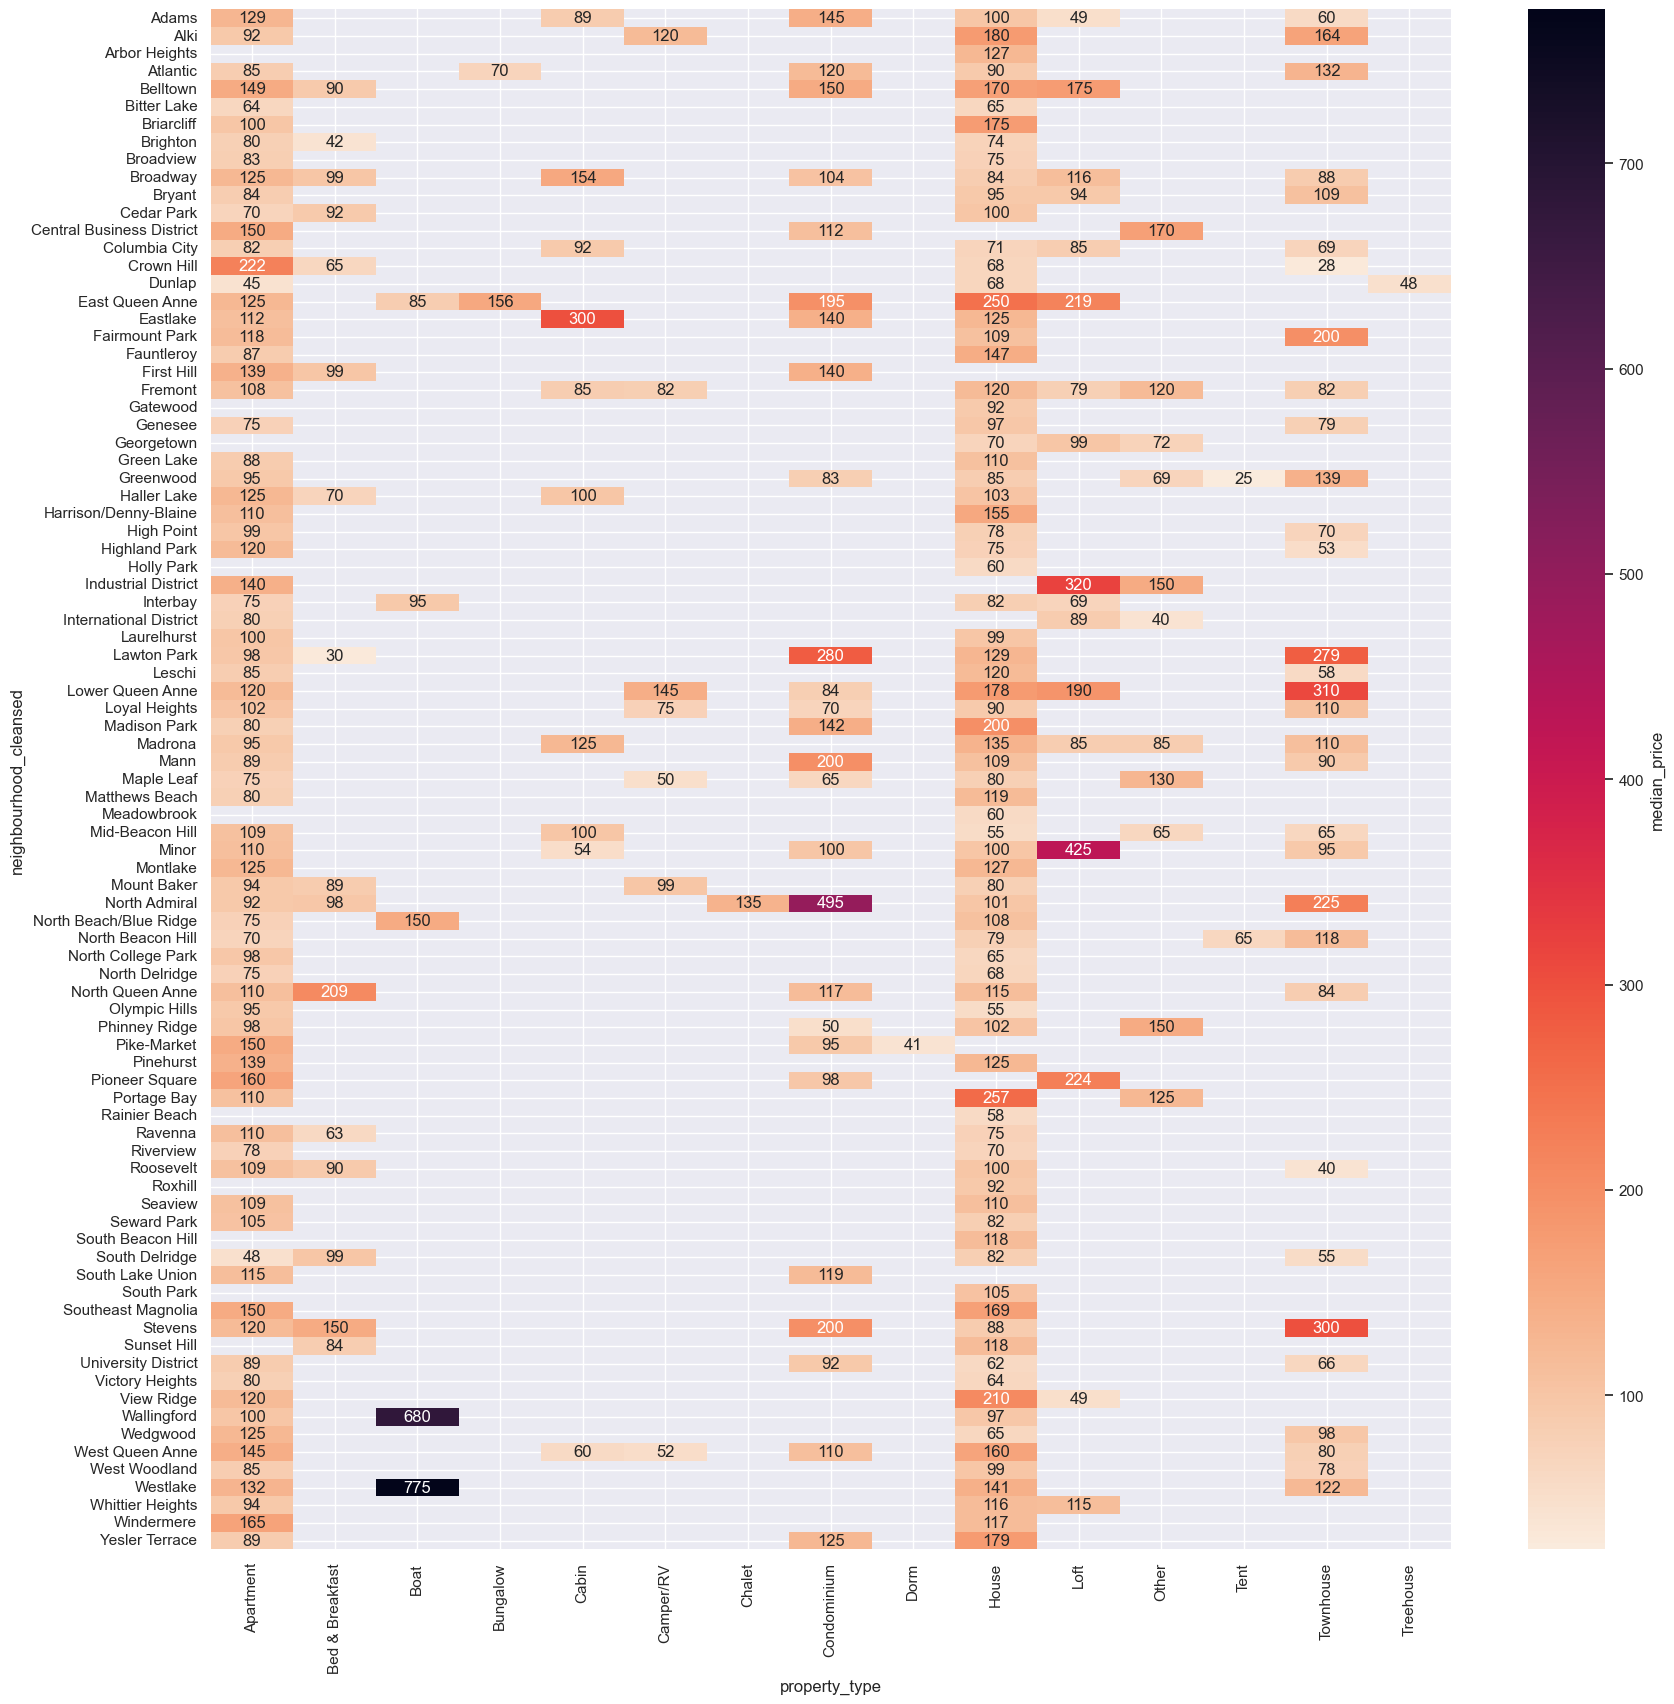

In [6]:
#plotting a heatmap of the neighbourhoods vs property type with the median price

plt.figure(figsize=(20,20))
sb.heatmap(listingDF.groupby([
        'neighbourhood_cleansed', 'property_type']).price.median().unstack(),annot=True, fmt=".0f", cmap = sb.cm.rocket_r, cbar_kws={'label': 'median_price'})

A heatmap was plotted to give a short and quick intuition of whether location plays a part in price of the listing. From the heatmap above, we can infer 2 things. First is that the **majority of listing types (Apartments & Houses) are listed in almost all neighbourhoods**. The second thing we can infer is that there are **some neighbourhood rows which tend to be darker than other neighbourhood rows** in the heatmap above. This could possibly mean location might have some influence in the price. So, we will analyze this further.

#### Analysing number of listings of each room type in the neighbourhoods

In [7]:
#geographical Clusters to find out which area in Boston has maximum listings on Airbnb

#seggregating each type of property

home = listingDF[(listingDF.room_type == 'Entire home/apt')]
private = listingDF[(listingDF.room_type == 'Private room')]
shared = listingDF[(listingDF.room_type == 'Shared room')]

location_home = home[['latitude', 'longitude']]
location_private = private[['latitude', 'longitude']]
location_shared = shared[['latitude', 'longitude']]

#### Finding the number of listings for each neighbourhood and median price

In [10]:
#grouping neighbourhood by number of listings and then cleaning them

neighbourhood_DF=home.groupby('neighbourhood_cleansed').id.count()
neighbourhood_DF=neighbourhood_DF.reset_index()
neighbourhood_DF=neighbourhood_DF.rename(columns={'id':'Number_Of_Listings'})
neighbourhood_DF=neighbourhood_DF.sort_values('Number_Of_Listings',ascending=[0])
neighbourhood_DF.head()

,neighbourhood_cleansed,Number_Of_Listings
9,Broadway,166
4,Belltown,143
79,Wallingford,85
21,Fremont,83
12,Central Business District,72


In [11]:
#grouping neighbourhood by average price of listings and cleaning them

neighbourhoodPrice_DF=home.groupby('neighbourhood_cleansed').price.median()
neighbourhoodPrice_DF=neighbourhoodPrice_DF.reset_index()
neighbourhoodPrice_DF=neighbourhoodPrice_DF.rename(columns={'price':'Median_Price'})
neighbourhoodPrice_DF=neighbourhoodPrice_DF.sort_values('Median_Price',ascending=[0])
neighbourhoodPrice_DF.head()

,neighbourhood_cleansed,Median_Price
75,Sunset Hill,350.0
32,Industrial District,235.0
73,Southeast Magnolia,226.5
31,Holly Park,215.0
36,Lawton Park,212.5


In [12]:
#merging the two dataframes

mergeDF=pd.merge(neighbourhood_DF,neighbourhoodPrice_DF,on='neighbourhood_cleansed')
mergeDF.head()

,neighbourhood_cleansed,Number_Of_Listings,Median_Price
0,Broadway,166,142.0
1,Belltown,143,150.0
2,Wallingford,85,135.0
3,Fremont,83,138.0
4,Central Business District,72,149.5


Text(0, 0.5, 'Number_Of_Listings')

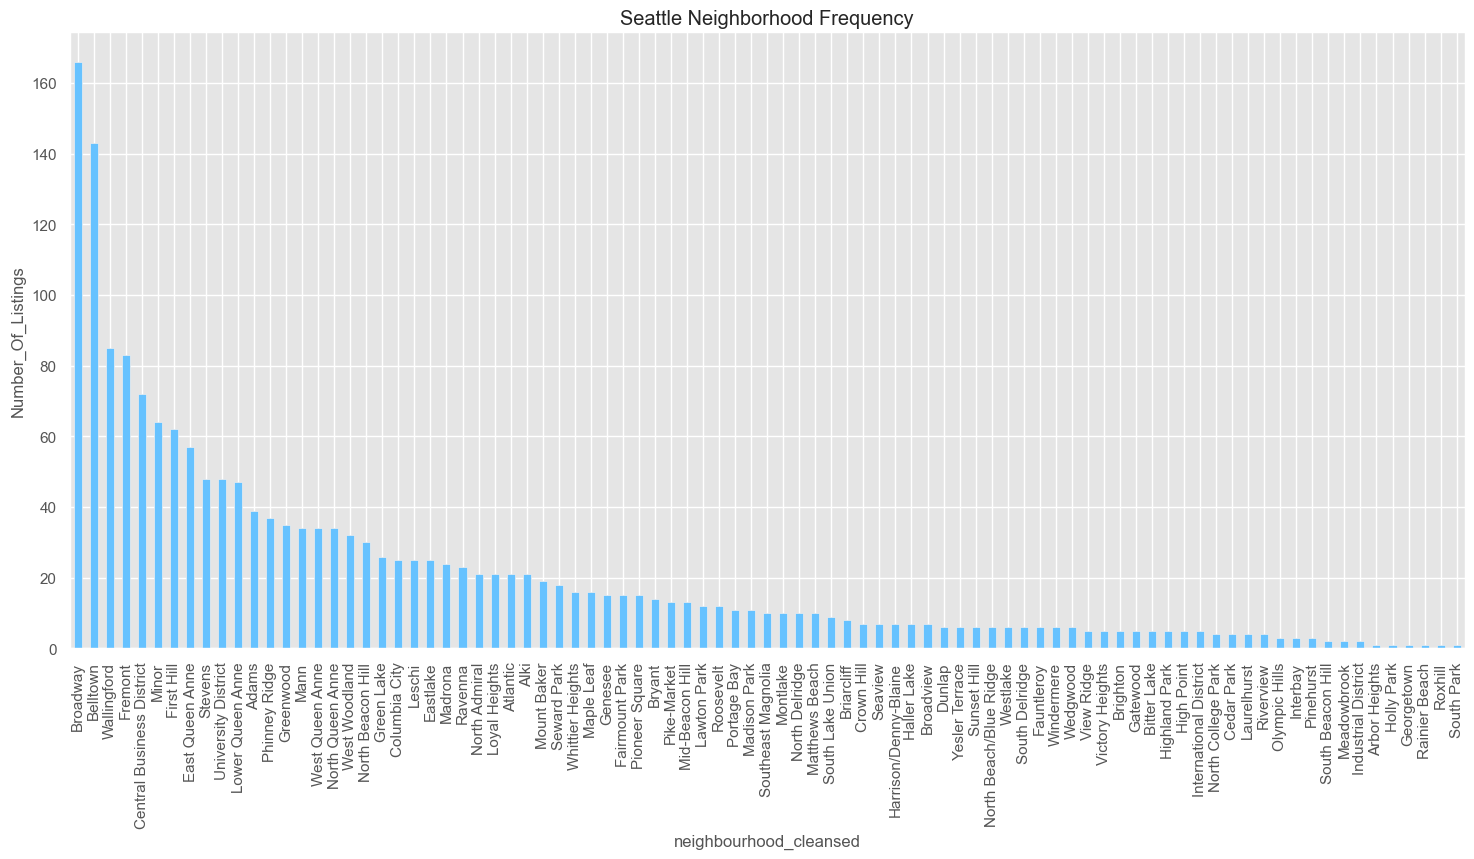

In [13]:
#visualizing the number of listings for each neighbourhood
matplotlib.style.use('ggplot')

objects = neighbourhood_DF['neighbourhood_cleansed']
y_pos = neighbourhood_DF['Number_Of_Listings']

neighbourhood_DF.plot(kind='bar', 
           x='neighbourhood_cleansed',
           y='Number_Of_Listings',
           color = '#66c2ff', 
           figsize =(18,8), 
           title = 'Seattle Neighborhood Frequency', 
           legend = False)

plt.ylabel('Number_Of_Listings')

We can see that most of the listings appear in 'Broadway', 'Belltown', 'Fremont', 'East/North/West Queen Anne' etc. This gives us a good insight into the potential neighbourhoods where there are high number of listings. Our next step would be to analyze it with the price.

C:\Users\Rutika\AppData\Local\Temp\ipykernel_2788\83186576.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(y = "neighbourhood_cleansed", x = "price", data = listingDF, palette="Set2")


<Axes: xlabel='price', ylabel='neighbourhood_cleansed'>

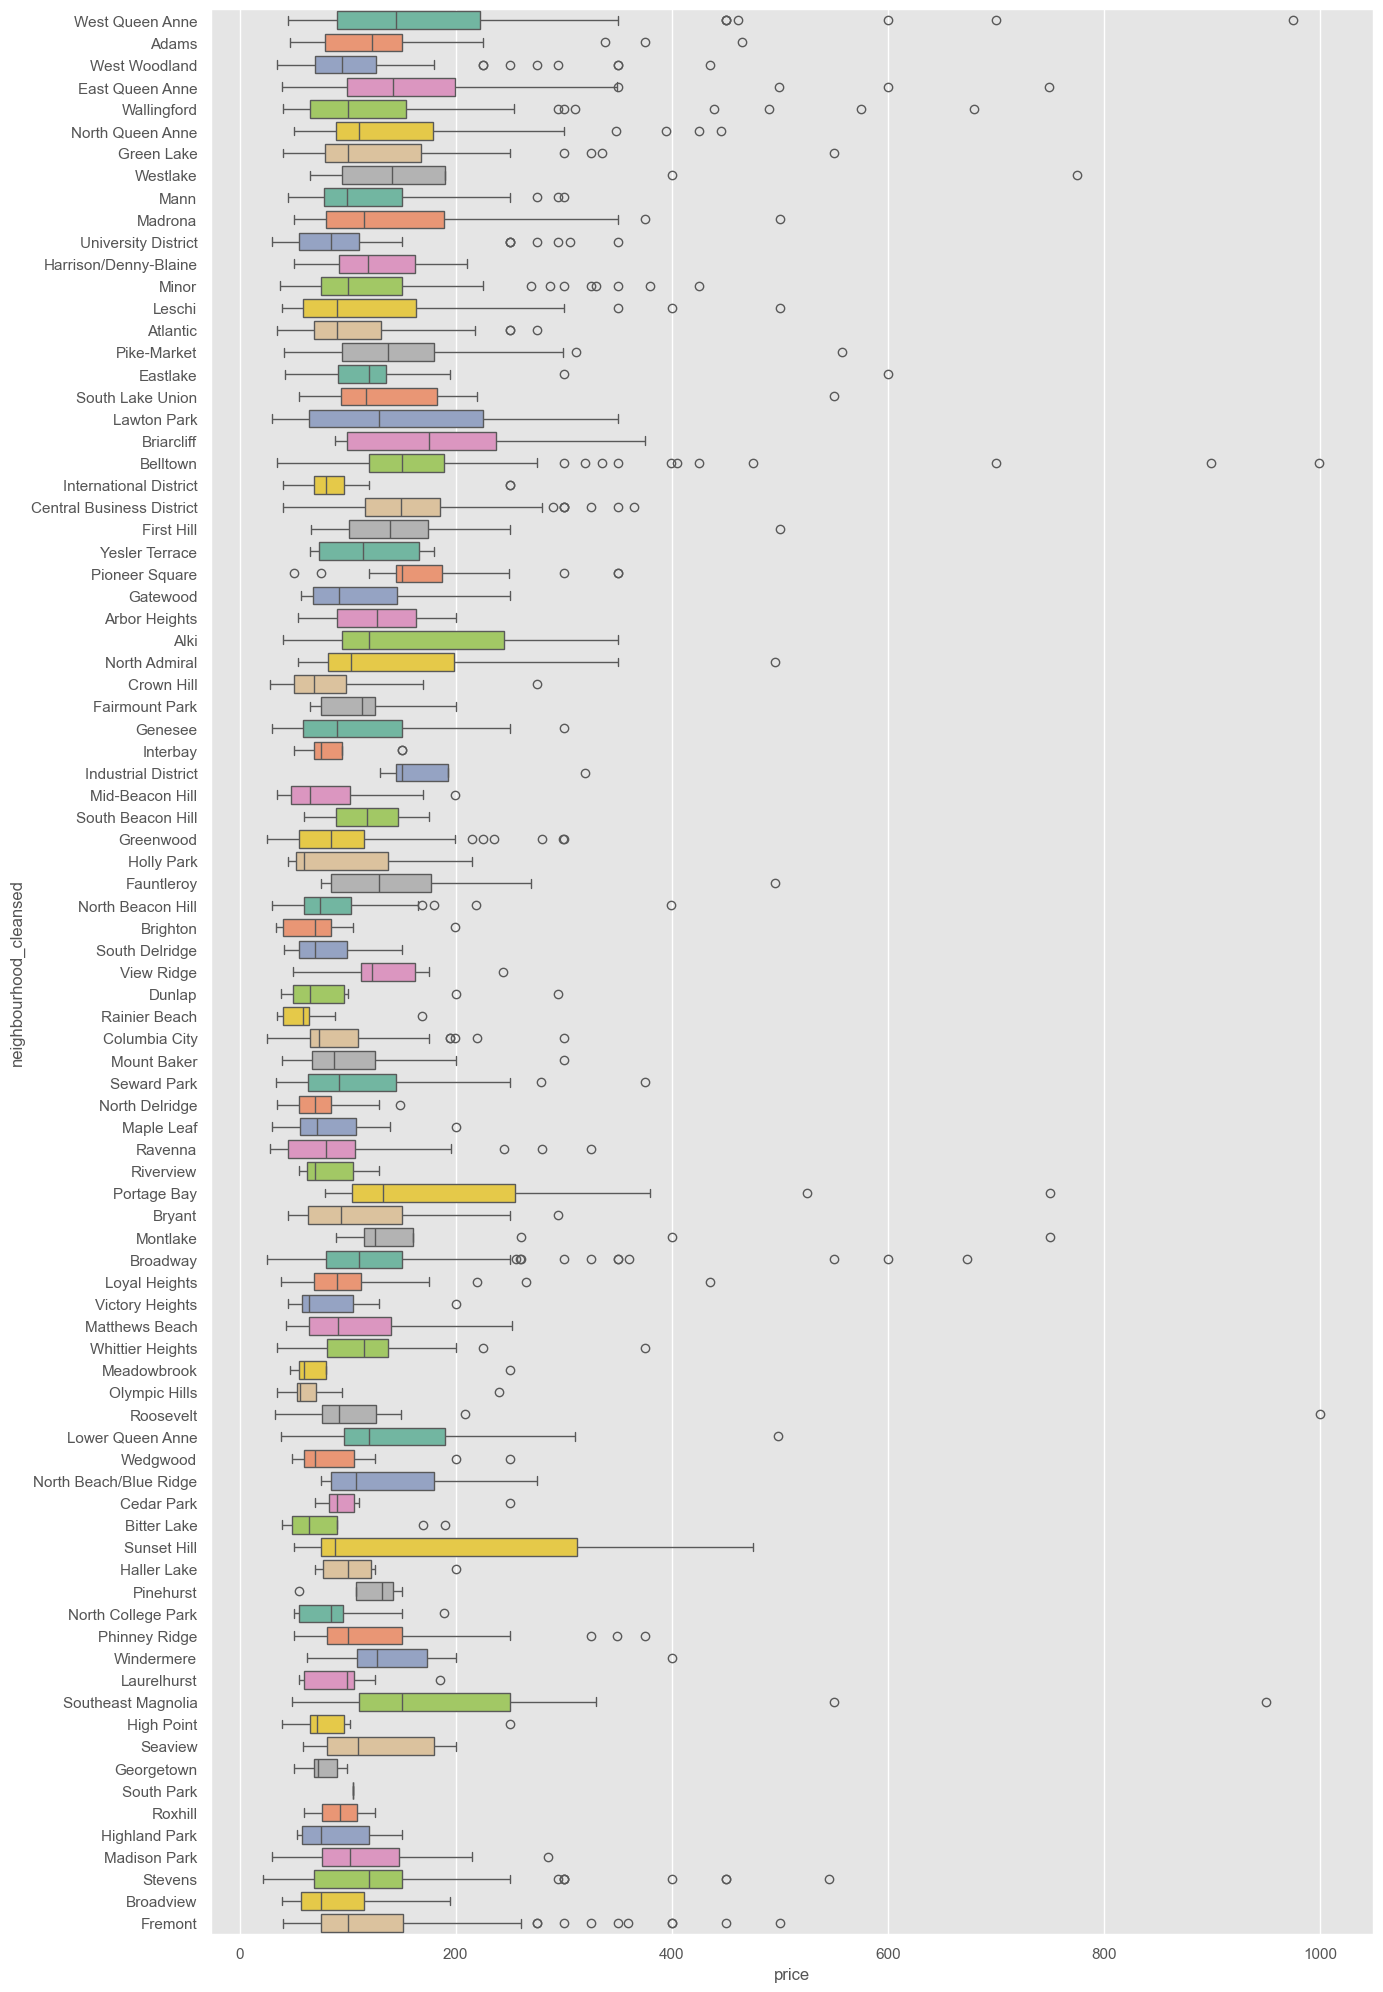

In [14]:
plt.figure(figsize = (15,25))
sb.boxplot(y = "neighbourhood_cleansed", x = "price", data = listingDF, palette="Set2")

Text(0, 0.5, 'Median Price')

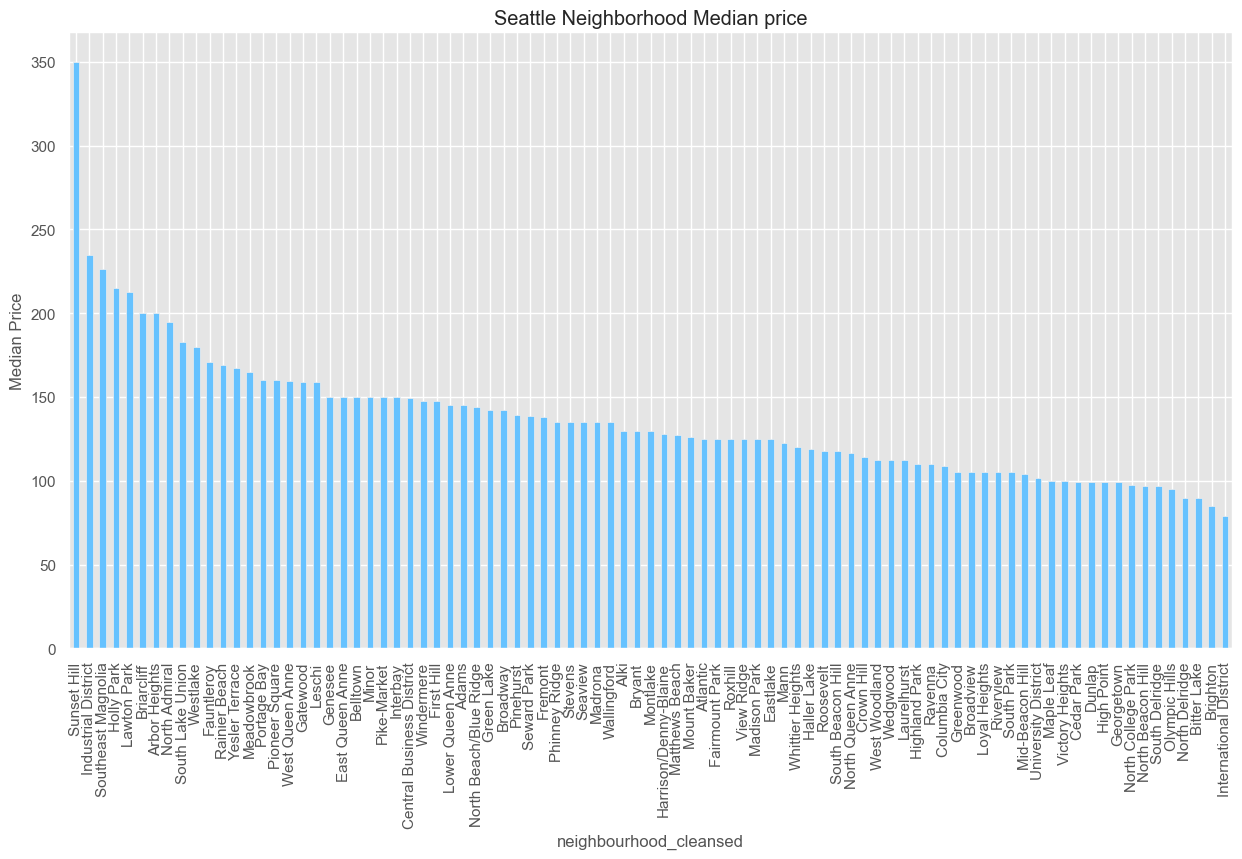

In [15]:
matplotlib.style.use('ggplot')

objects = neighbourhoodPrice_DF['neighbourhood_cleansed']
y_pos = neighbourhoodPrice_DF['Median_Price']

neighbourhoodPrice_DF.plot(kind='bar', 
           x='neighbourhood_cleansed',
           y='Median_Price',
           color = '#66c2ff', 
           figsize =(15,8), 
           title = 'Seattle Neighborhood Median price', 
           legend = False)

plt.ylabel('Median Price')

By analyzing the number of listings and prices for each neighborhood, we can get a clearer understanding of which neighbourhoods have a lot of expensive listings. Looking at the analysis done so far, we can see that certain neighbourhoods are indeed more 'expensive' than others. However, some of those neighbourhoods do not have as many listings as other expensive neighbourhoods. Since our problem was to identify factors that make a listing more expensive, we can infer that these neighbourhoods tend to have more expensive listings. However, a more thorough inference would be to identify neighbourhoods that have both a higher number of listings and higher price as lower number of listings would mean fewer available listing for a customer to choose.

As such, neighbourhoods such as 'Belltown', 'West Queen Anne' are neighbourhoods that have a lot of expensive listings.